# Intro to KNN

### LEARNING OBJECTIVES

- Intuition behind the KNN algorithm
- Implement KNN with sklearn

---

# K Nearest Neighbors classification walkthrough

From here on out we are going to look at how the kNN algorithm classifies an unknown point using a randomly generated dataset.

---

<a id='nonparametric'></a>

### Note on parametric vs. nonparametric methods

Thus far, all of our tests and methods have been **parametric**. That is, we have assumed a certain distribution for our data. In linear regression our parameters are the coefficients in our model, and our estimate of the target is calculated from these parameters.

There are alternatives in the case where we cannot assume a particular distribution for our data or choose not to. These methods are **nonparametric** When we make no assumptions about the distribution for our data, we call our data nonparametric. For nearly every parametric test, there is a nonparametric analog available. The KNN model is an example of a nonparametric model. You can see that there are no coefficients for the different predictors and our estimate is not represented by a formula of our predictor variables.

---

## kNN

![](https://snag.gy/hatSE6.jpg)

The pseudocode algorithm for kNN is as follows:



```
for unclassified_point in sample:
    for known_point in known_class_points:
        calculate distances (euclidean or other) between known_point and unclassified_point
    for k in range of specified_neighbors_number:
        find k_nearest_points in known_class_points to unclassified_point
    assign class to unclassified_point using "votes" from k_nearest_points
```
> ### Common KNN Distance Functions
> These distance functions can be used with KNN.  Euclidean is the most common choice.
>
> ### Euclidean  
> $\sqrt{\sum\limits_{i=1}^k(x_i - y_i)^2}$
>
> ### Manattan 
> $\sum\limits_{i=1}^k \left| x_i - y_i \right|$
>
> ### Minkowski
> $\left(\sum_{i=1}^n |x_i-y_i|^p\right)^{1/p}$

---

[NOTE: in the case of ties, sklearn's `KNeighborsClassifier()` will just choose the first class using uniform weights! If this is unappealing to you you can change the weights keyword argument to 'distance'.]



<a id='euclidean'></a>
## Euclidean distance

---
KNN typically uses one of two distance metrics: euclidean or manhattan. Other distance metrics are possible, but more rare (sometimes it makes sense to create your own distance function).


Recal the famous Pythagorean Theorem
![Alt text](http://ncalculators.com/images/pythagoras-theorem.gif)

We can apply the theorem to calculate distance between points. This is called Euclidean distance. 

![Alt text](http://rosalind.info/media/Euclidean_distance.png)

### $$\text{Euclidean  distance}=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

There are many different distance metrics, but Euclidean is the most common (and default in sklearn).


In [1]:
ryan = (6.5, 2.5)
hock = (8, 2)


((ryan[0] - hock[0])**2 + (ryan[1] - hock[1])**2) ** (1/2)

1.5811388300841898

## Load libraries

We'll need the following libraries for today's lecture:
1. `pandas`
2. `numpy`
3. `matplotlib` and `seaborn`
4. `KNeighborsClassifier` from `sklearn`'s `neighbors` module
5. The `load_iris` function from `sklearn`'s `datasets` module
6. `train_test_split` and `cross_val_score` from `sklearn`'s `model_selection` module
7. `StandardScaler` from `sklearn`'s `preprocessing` module

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
import seaborn as sns

%matplotlib inline

## The Iris Dataset

> The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other. - [Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Most `sklearn` can be ran as follows:
```python
data = load_iris()
```

In [3]:
data = load_iris()

## `load_iris()` properties

The `data` variable has several important properties you'll need to be familiar with:
1. `data.data`: This is your `X`. In our case, it's a 150x4 matrix of features.
2. `data.target`: This is your `y`. It's an array of 150 values (0, 1, 2). Each index corresponds do a different species of Iris flower.
3. `data.feature_names`: These are the names of each of your 4 features (corresponding to the 4 columns in `data.data`
4. `data.target_names`: These are the names of your 3 Iris species: Setosa, Versicolor and Virginica. **The order in `data.target_names` corresponds to the index in `data.target`.**

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Challenge: Create a `pandas` DataFrame from `load_iris()`

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['species'] = df['species'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

## Data Cleaning

Let's see if our `DataFrame` requires any cleaning. In the cells below:
1. Check the `dtypes` to make sure every column is numberical
2. Check for null values

In [9]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [11]:
target = 'species'
y = df[target]
X = df.drop(target, axis=1)
y[:5]

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y)
le.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
# run once
y = le.transform(y)

In [14]:
le.inverse_transform([2])

array(['virginica'], dtype=object)

## EDA: Visualizing KNN

Using matplotlib, create a scatter plot using two features from your `DataFrame`: `petal length (cm)` and `petal width (cm)`. Each dot should be colored according to their species.

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
color_dict = {0: 'red', 1: 'blue', 2: 'green'}

In [17]:
colors = [color_dict[yi] for yi in y]

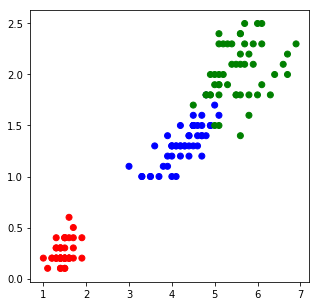

In [18]:
plt.figure(figsize=(5, 5))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color=colors)

## EDA: Pairplot

Let's expand on the scatter plot created in the previous step. We can use Seaborn's `.pairplot()` method to create our scatter plots using all of our features.

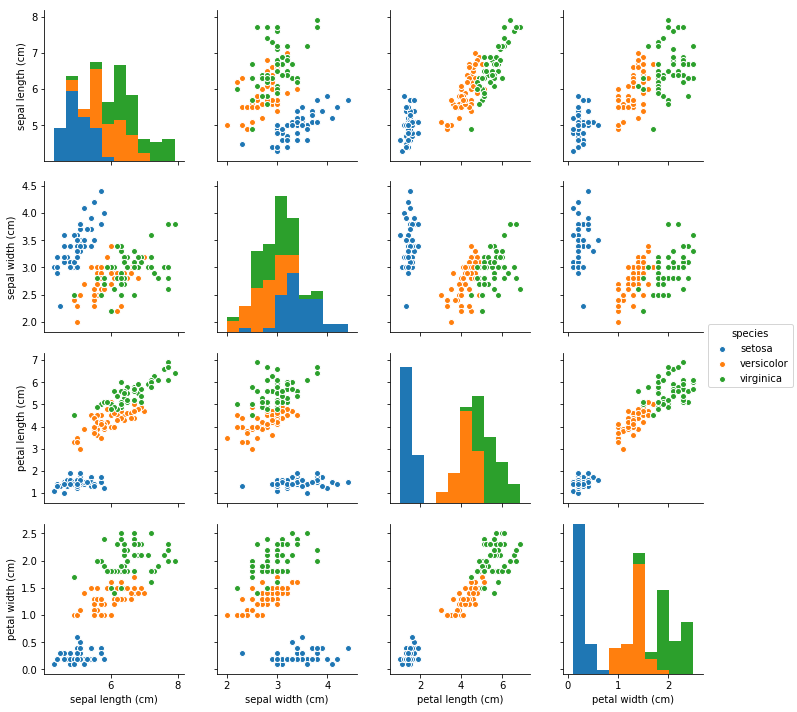

In [19]:
sns.pairplot(df, hue='species');

## Train/Test split

Use the `train_test_split` function to split your data into a training set and a holdout set.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## `StandardScaler`

Because KNN is calculating the distance between neighbors, it's highly sensitive to the magnitude of your features. For example, if we were using KNN on a housing dataset, a feature like square footage (measured in **thousands** of feet^2) can really affect the distance. 

Thus, in order for KNN to work properly, it's important to scale our data. In the cells below, create an instance of `StandardScaler` and use it to transform `X_train` and `X_test`.

In [21]:
ss = StandardScaler()

Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)

In [22]:
ss.scale_

array([0.81545772, 0.43516414, 1.72754545, 0.74460646])

## Instantiate KNN

For the `KNeighborsClassifier`, there a few important parameters to keep in mind:

1. `n_neighbors`: this is the "K" in KNN. The best K will change from problem to problem, but the default is 5.
2. `weights`: The neighbors can all have an equal vote (`uniform`), or the closer points can have a higher weighted vote (`distance`).
3. `p`: The distance metric. The default is Euclidean distance (2). Changing it to 1 is setting the distance to Manhattan.

In the cell below, instantiate a `knn` model using the default parameters.

In [23]:
knn = KNeighborsClassifier()

## Cross validation

In the cell below, use `cross_val_score` to see what accuracy we can expect from our KNN model.

In [24]:
cross_val_score(knn, Z_train, y_train, cv=5)

array([0.91304348, 0.95652174, 0.81818182, 1.        , 0.90909091])

What happens if you change the value of K to 2?

In [25]:
cross_val_score(KNeighborsClassifier(n_neighbors=2), Z_train, y_train, cv=5)

array([0.95652174, 0.91304348, 0.86363636, 1.        , 0.90909091])

In [26]:
incomes = [10000, 57000, 85000, 160000, 3_000_000, 75_000_000, 0]

In [27]:
np.set_printoptions(suppress=True)

log_income = np.log1p(incomes)
np.expm1(log_income)

array([   10000.        ,    57000.        ,    85000.        ,
         160000.        ,  3000000.        , 75000000.00000003,
              0.        ])

## Model fitting and evaluation

Now that we know what we can expect from our KNN model, let's 
1. fit the model to `X_train_scaled`, `y_train`
2. score it on `X_test_scaled`, `y_test`

In [28]:
knn.fit(Z_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
knn.score(Z_train, y_train), knn.score(Z_test, y_test)

(0.9642857142857143, 1.0)

In [30]:
knn.predict_proba(Z_test)

array([[0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ]])

## Model Evaluation II

In [31]:
from sklearn.metrics import classification_report, confusion_matrix 

y_pred = knn.predict(Z_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [32]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Z_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [33]:
error

[0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895,
 0.6842105263157895]

## Pros and Cons of KNN

#### Pros

One of the most attractive features of the K-nearest neighbor algorithm is that is simple to understand and easy to implement. With zero to little training time, it can be a useful tool for off-the-bat analysis of some data set you are planning to run more complex algorithms on. Furthermore, KNN works just as easily with multiclass data sets whereas other algorithms are hardcoded for the binary setting. Plus, the non-parametric nature of KNN gives it an edge in certain settings where the data may be highly “unusual”.

#### Cons

One of the obvious drawbacks of the KNN algorithm is the computationally expensive testing phase which is impractical in industry settings. Note the rigid dichotomy between KNN and the more sophisticated Neural Network which has a lengthy training phase albeit a very fast testing phase. Furthermore, KNN can suffer from skewed class distributions. For example, if a certain class is very frequent in the training set, it will tend to dominate the majority voting of the new example (large number = more common). Finally, the accuracy of KNN can be severely degraded with high-dimension data because there is little difference between the nearest and farthest neighbor.